# Chicago Crime Data Project

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from shapely.geometry import Point
import numpy as np

In [2]:
#this takes ~15 minutes
crimes = pd.read_csv('Crimes_-_2001_to_present.csv')
crimes['Date'] = pd.to_datetime(crimes['Date'])

In [5]:
#Gettings Number of Reported Crimes and Arrests by Year
yearly_crimes = crimes.groupby(by=[crimes['Date'].dt.year]).count()
yearly_arrests = crimes[crimes['Arrest']].groupby(by=[crimes['Date'].dt.year]).count()

#To properly format x-axis
yearly_crimes.index = pd.to_datetime(yearly_crimes.index.astype(str), format='%Y')
yearly_arrests.index = pd.to_datetime(yearly_arrests.index.astype(str), format='%Y')


# A Brief Overview of Crime, 2001-2017

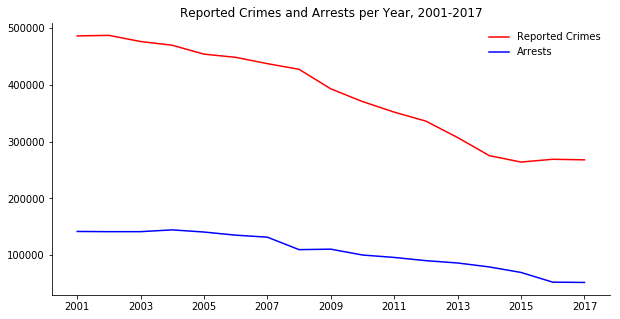

In [6]:
fig, ax = plt.subplots(figsize=(10,5))

#Exclude 2018 as data is not complete
ax.plot(yearly_crimes.index[:-1], yearly_crimes['ID'][:-1], color = 'red', label = 'Reported Crimes')
ax.plot(yearly_arrests.index[:-1], yearly_arrests['ID'][:-1], color = 'blue', label = 'Arrests')

#Ticks every other year starting with 2011
ax.set_xticks(yearly_crimes.index[:-1][::2])

#Plot formatting
ax.legend(frameon=False)
ax.set_title('Reported Crimes and Arrests per Year, 2001-2017')
sns.despine(ax=ax)
plt.show()

In [8]:
#Filter Crimes Data by only drug arrests
drugs = crimes[(crimes['Primary Type']=='NARCOTICS') & (crimes['Arrest'])].groupby(by=[crimes['Date'].dt.year]).count()

#Filter Crimes data by only violent arrests
violent = crimes[((crimes['Primary Type']=='HOMICIDE')            | 
                  (crimes['Primary Type']=='CRIM SEXUAL ASSAULT') |
                  (crimes['Primary Type']=='ROBBERY')             | 
                  (crimes['Primary Type']=='BATTERY')             | 
                  (crimes['Primary Type']=='ASSAULT')             | 
                  (crimes['Primary Type']=='BURGLARY')            |
                  (crimes['Primary Type']=='ARSON'))              &
                  (crimes['Arrest'])].groupby(by=[crimes['Date'].dt.year]).count()

drugs.index = pd.to_datetime(drugs.index.astype(str), format='%Y')
violent.index = pd.to_datetime(violent.index.astype(str), format='%Y')


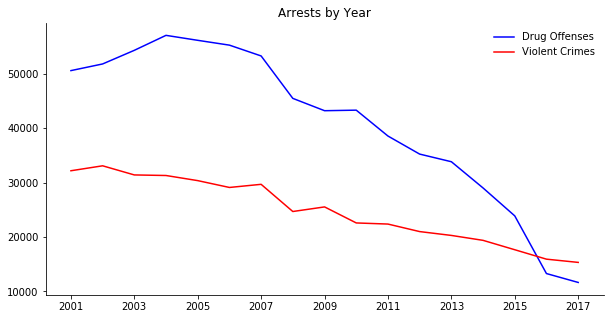

In [9]:
fig, ax = plt.subplots(figsize=(10,5))

#Plot drug arrests and violent crimes arrests, excluding 2018 for incomplete data
ax.plot(drugs.index[:-1], drugs['ID'][:-1], color = 'blue', label = 'Drug Offenses')
ax.plot(violent.index[:-1], violent['ID'][:-1], color = 'red', label = 'Violent Crimes')

#Ticks every other year starting with 2011
ax.set_xticks(yearly_crimes.index[:-1][::2])

#Plot formatting
ax.set_title('Arrests by Year')
ax.legend(frameon=False)
sns.despine(ax=ax)
plt.show()


In [16]:
#A look at drug offense types in 2001
d01 = pd.DataFrame(crimes_2001[crimes_2001['Crime']=='NARCOTICS'].groupby(['Description']).count().sort_values(by=['Crime'],ascending=False)[:10]['Crime'])
d01.rename(columns={'Crime':'2001'},inplace=True)
d01

,2001
Description,
POSS: CANNABIS 30GMS OR LESS,14337
POSS: CRACK,14162
POSS: HEROIN(WHITE),7754
MANU/DELIVER:CRACK,2350
SOLICIT NARCOTICS ON PUBLICWAY,1675
POSS: COCAINE,1631
POSS: CANNABIS MORE THAN 30GMS,1452
MANU/DELIVER: HEROIN (WHITE),1259
ATTEMPT POSSESSION NARCOTICS,1106


In [17]:
#A look at drug offenses in 2017
d17 = pd.DataFrame(crimes_2017[crimes_2017['Crime']=='NARCOTICS'].groupby(['Description']).count().sort_values(by=['Crime'],ascending=False)[:10]['Crime'])
d17.rename(columns={'Crime':'2017'},inplace=True)
d17

,2017
Description,
POSS: HEROIN(WHITE),2238
POSS: CANNABIS 30GMS OR LESS,1217
POSS: CRACK,1128
MANU/DELIVER: HEROIN (WHITE),1081
FOUND SUSPECT NARCOTICS,999
POSS: CANNABIS MORE THAN 30GMS,722
MANU/DEL:CANNABIS 10GM OR LESS,665
MANU/DEL:CANNABIS OVER 10 GMS,611
POSS: COCAINE,549


In [20]:
#Subsetting crimes data for only 2017 data
crimes_2017 = crimes[crimes['Date'].dt.year==2017]

#Formatting columns
crimes_2017 = crimes_2017.rename(columns={'Primary Type':'Crime','Community Area':'Community'})
crimes_2017 = crimes_2017.drop(['IUCR','ID','Case Number'],axis = 1)

#Converting to a GeoDataFrame
crimes_2017['Location'] = list(zip(crimes_2017.Longitude, crimes_2017.Latitude))
crimes_2017['Location'] = crimes_2017['Location'].apply(Point)
crimes_2017 = gpd.GeoDataFrame(crimes_2017, geometry='Location')

In [21]:
#2001 Crimes Database
crimes_2001 = crimes[crimes['Date'].dt.year==2001]

#Formatting columns
crimes_2001 = crimes_2001.rename(columns={'Primary Type':'Crime','Community Area':'Community'})
crimes_2001 = crimes_2001.drop(['IUCR','ID','Case Number','Block','Ward','Beat','District'],axis = 1)

#Convert to GeoDataFrame
crimes_2001['Location'] = list(zip(crimes_2001.Longitude, crimes_2001.Latitude))
crimes_2001['Location'] = crimes_2001['Location'].apply(Point)
crimes_2001 = gpd.GeoDataFrame(crimes_2001, geometry='Location')

In [22]:
#Crime in 2017 grouped by crime type 
crime_type17 = crimes_2017.groupby(['Crime']).count()['Date']
crime_type17 = pd.DataFrame(crime_type17)
crime_type17.rename(columns={'Date':'2017'},inplace=True)
crime_type17['Percent'] = crime_type17['2017']/crime_type17['2017'].sum()*100
crime_type17.sort_values(by=['Percent'],ascending=False,inplace=True)

#Arrests in 2017 grouped by crime type 
arrest_type17 = crimes_2017[crimes_2017['Arrest']].groupby(['Crime']).count()['Date']
arrest_type17 = pd.DataFrame(arrest_type17)
arrest_type17.rename(columns={'Date':'2017'},inplace=True)
arrest_type17['Percent'] = arrest_type17['2017']/arrest_type17['2017'].sum()*100
arrest_type17.sort_values(by=['Percent'],ascending=False,inplace=True)

#Crime in 2001 grouped by crime type 
crime_type01 = crimes_2001.groupby(['Crime']).count()['Date']
crime_type01 = pd.DataFrame(crime_type01)
crime_type01.rename(columns={'Date':'2001'},inplace=True)
crime_type01['Percent'] = crime_type01['2001']/crime_type01['2001'].sum()*100
crime_type01.sort_values(by=['Percent'],ascending=False,inplace=True)

#Arrests in 2017 grouped by crime type 
arrest_type01 = crimes_2001[crimes_2001['Arrest']].groupby(['Crime']).count()['Date']
arrest_type01 = pd.DataFrame(arrest_type01)
arrest_type01.rename(columns={'Date':'2001'},inplace=True)
arrest_type01['Percent'] = arrest_type01['2001']/arrest_type01['2001'].sum()*100
arrest_type01.sort_values(by=['Percent'],ascending=False,inplace=True)


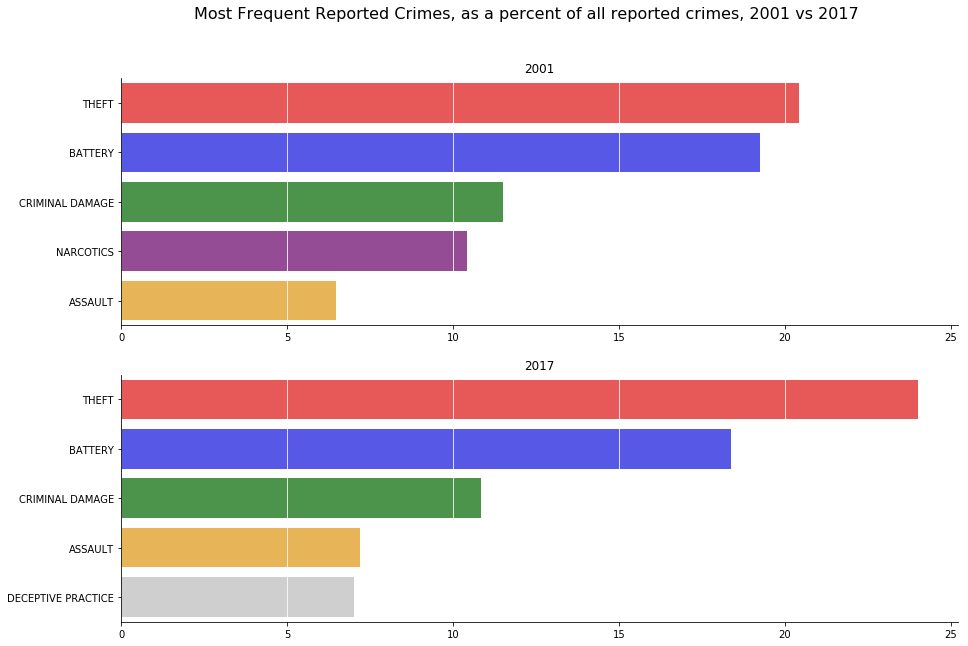

In [23]:
#5 most frequent types of crime for each dataframe
c = crime_type17[:5]
a = arrest_type17[:5]
c1 = crime_type01[:5]
a1 = arrest_type01[:5]

#Plot setup, title
fig, ax = plt.subplots(2,1,figsize = (15,10))
fig.suptitle("Most Frequent Reported Crimes, as a percent of all reported crimes, 2001 vs 2017", fontsize=16)

#Barplot for 2017 Crimes
sns.barplot(ax=ax[1],y=c.index,x=c['Percent'],palette=['Red','Blue','Green','Orange','Silver'],alpha=.75)
ax[1].grid(axis='x', color='white')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title('2017')
sns.despine(ax=ax[1])

#Barplot for 2001 Crimes
sns.barplot(ax=ax[0],y=c1.index,x=c1['Percent'],palette=['Red','Blue','Green','Purple','Orange'],alpha=.75)
ax[0].grid(axis='x', color='white')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_title('2001')

#So that the 2 plots have the same x-axis scale for easy comparisons
ax[0].set_xlim(0,25.22)
sns.despine(ax=ax[0])





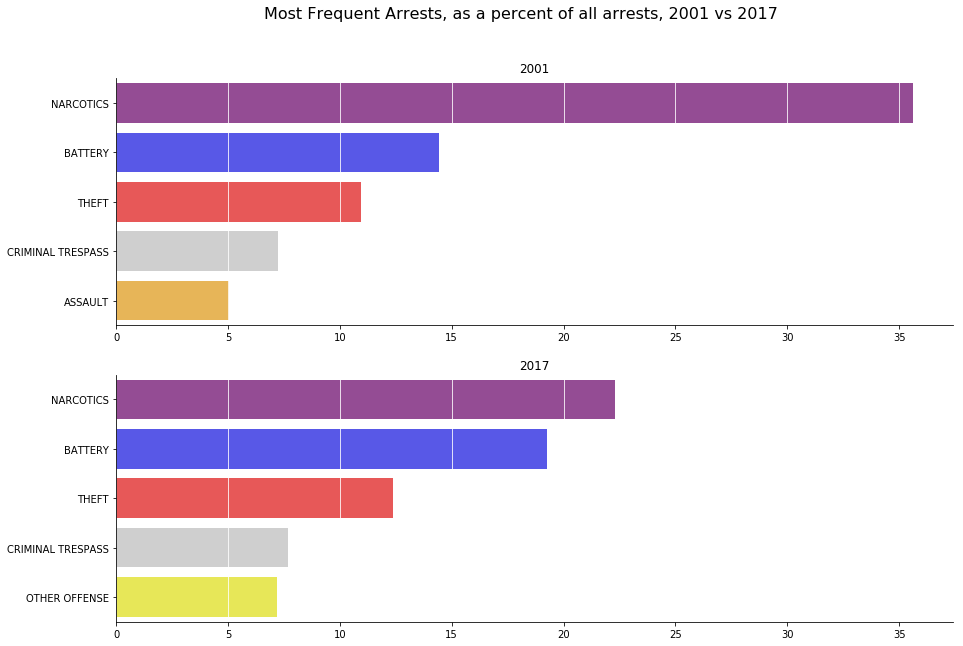

In [24]:
#Plot set-up
fig, ax = plt.subplots(2,1,figsize = (15,10))
fig.suptitle("Most Frequent Arrests, as a percent of all arrests, 2001 vs 2017", fontsize=16)

#2017 bar chart for arrests
sns.barplot(ax=ax[1],y=a.index,x=a['Percent'],palette=['Purple','Blue','Red','Silver','Yellow'],alpha=.75)
ax[1].grid(axis='x', color='white')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title('2017')
ax[1].set_xlim(0,37.41)
sns.despine(ax=ax[1])

#2001 barchart for arrests
sns.barplot(ax=ax[0],y=a1.index,x=a1['Percent'],palette=['Purple','Blue','Red','Silver','Orange'],alpha=.75)
ax[0].grid(axis='x', color='white')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_title('2001')
sns.despine(ax=ax[0])


In [25]:
###Creating Communities mega-dataframe, with data on each community for all desired facets

#Setup of communities GeoDataFrame
communities = gpd.read_file('Boundaries - Community Areas (current)/geo_export_0d4d099a-05bd-425f-b31f-496a7eb72f08.shp')
communities = communities.drop(['area','area_num_1','comarea','comarea_id','perimeter','shape_area','shape_len'],axis=1)
communities = communities.rename(columns={'area_numbe':'id'})
communities['id'] = pd.to_numeric(communities['id'])
communities = communities.sort_values(by=['id'])



#Adding demographic Data for each Community
pop = pd.read_csv('Population by community.csv')
pop = pop.drop([77,78])
pop['Community Area'] = pd.to_numeric(pop['Community Area'])
cols = ['White','Black','American Indian','Asian','Other','Hispanic','Multiple','TOTAL']
for c in cols:
    pop[c] = pd.to_numeric(pop[c].str.replace(',', ''))
communities = pd.merge(left=communities,right=pop,left_on='id',right_on='Community Area',how='inner')
communities = communities.drop(['id','community'],axis=1)
communities['non_white'] = 1 - (communities['White']/communities['TOTAL'])
communities['Black_Percent'] = communities['Black']/communities['TOTAL']
communities['His_Percent'] = communities['Hispanic']/communities['TOTAL']
communities['White_Percent'] = communities['White']/communities['TOTAL']
communities['non_white_count'] = communities['TOTAL']-communities['White']


#Reorder columns. Not necessary but I didn't want the shapefile info at the beginning
order = communities.columns.tolist()
order = order[1:] + order[0:1]
communities = communities[order]



#Merging the total number of crimes in each community in 2017 to create the '2017_Crimes' column
grouped = crimes_2017.groupby(['Community']).count()['Date']
grouped = pd.DataFrame(grouped)
grouped = grouped.reset_index()
grouped = grouped.rename(columns={'Date':'2017_Crimes'})
grouped['Community'] = pd.to_numeric(grouped['Community'])
communities = pd.merge(left=communities,right=grouped,left_on='Community Area',right_on='Community',how='left')
communities = communities.drop(['Community'],axis=1)
communities = communities.set_index('Community Area')



#Adding column for Crimes Rate (per 100)
communities['Crimes_per_100'] = communities['2017_Crimes']/communities['TOTAL']*100



#Merging the total number of arrests in each community in 2017 to create the '2017_Arrests' column
arrests = crimes_2017[crimes_2017['Arrest']].groupby(['Community']).count()['Date']
arrests = pd.DataFrame(arrests)
arrests = arrests.rename(columns={'Date':'2017_Arrests'})
communities = pd.merge(left=communities,right=arrests,left_on='Community Area',right_index=True,how='left')



#Column for the center of each community area, geographically
communities['Center'] = communities.centroid



#Creates a column for every crime type for each community with the total number of ARRESTS for that crime
counts = pd.DataFrame(crimes_2017[crimes_2017['Arrest']].groupby(['Community','Crime']).count())['Date']
counts = counts.unstack(['Crime'])
counts.fillna(0,inplace=True)
communities = pd.merge(left=communities,right=counts,left_index=True,right_index=True,how='inner')
communities.index = pd.to_numeric(communities.index)



#Socio-Economic Data for each Community Area
soc = pd.read_csv('Poverty.csv')
communities = pd.merge(left=communities,right=soc,left_index=True,right_on='Community Area',how='inner')
communities.set_index('Community Area',inplace=True)
communities.drop(columns='Community Area Name',inplace=True)



#Which 'side' of chicago each community belongs to. There are 9 'sides' of Chicago
side = pd.read_csv('Side by Community.csv')
communities = pd.merge(left=communities,right=side,left_index=True,right_on='Community Area',how='inner')
communities.set_index('Community Area',inplace=True)



##Creates a column for every crime type for each community with the total number of REPORTED CRIMES for that crime
counts2 = pd.DataFrame(crimes_2017.groupby(['Community','Crime']).count())['Date']
counts2 = counts2.unstack(['Crime'])
counts2.fillna(0,inplace=True)
communities = pd.merge(left=communities,right=counts2,left_index=True,right_index=True,how='inner')


#Creating a column for numnber of violent reported crimes in each community
counts2['Violent_Crimes'] = (counts2['HOMICIDE']         + 
                          counts2['CRIM SEXUAL ASSAULT'] + 
                          counts2['ROBBERY']             +
                          counts2['BATTERY']             +
                          counts2['ASSAULT']             + 
                          counts2['BURGLARY']            +
                          counts2['ARSON']) 
communities['Violent_Crimes'] = counts2['Violent_Crimes']



#More violent crime statistics for each community
communities['non_violent_crimes_per'] = (communities['2017_Crimes']-communities['Violent_Crimes'])/communities['TOTAL']
communities['Violent_Crimes_per'] = communities['Violent_Crimes']/communities['TOTAL']
communities['non_violent_crimes'] = communities['2017_Crimes']-communities['Violent_Crimes']

#For later drug analysis
communities['Weed_Arrests']=crimes_2017[crimes_2017['Description']=='POSS: CANNABIS 30GMS OR LESS'].groupby(['Community']).count()['Date']

#Note: Each crime type is in the data twice: once for arrests (type_x) and once for reported crimes (type_y)
communities.head()

,Name,White,Black,American Indian,Asian,Other,Hispanic,Multiple,TOTAL,non_white,...,ROBBERY_y,SEX OFFENSE_y,STALKING_y,THEFT_y,WEAPONS VIOLATION_y,Violent_Crimes,non_violent_crimes_per,Violent_Crimes_per,non_violent_crimes,Weed_Arrests
1.0,Rogers Park,21618,14461,142,3523,241,13433,1573,54991,0.606881,...,168.0,28.0,1.0,1212.0,36.0,1358.0,0.050626,0.024695,2784.0,9.0
2.0,West Ridge,30706,8015,189,16184,228,14701,1919,71942,0.573184,...,115.0,25.0,3.0,915.0,23.0,1158.0,0.033805,0.016096,2432.0,6.0
3.0,Uptown,29098,11275,191,6414,140,8009,1235,56362,0.483730,...,103.0,25.0,1.0,967.0,23.0,1256.0,0.040967,0.022285,2309.0,13.0
4.0,Lincoln Square,24916,1488,72,4399,139,7562,917,39493,0.369103,...,63.0,9.0,3.0,616.0,9.0,607.0,0.035221,0.015370,1391.0,4.0
5.0,North Center,24634,738,55,1449,67,4330,594,31867,0.226975,...,52.0,5.0,1.0,537.0,4.0,363.0,0.033263,0.011391,1060.0,2.0


# Crime Characteristics, 2017

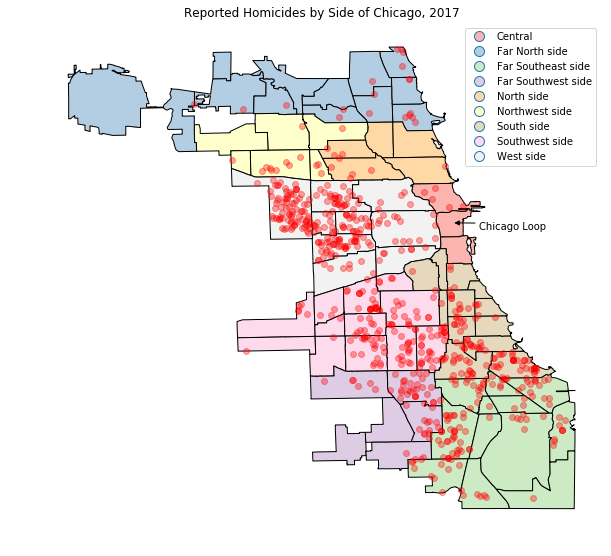

In [26]:
#Homicides overlayed on chicago sides map

fig, ax = plt.subplots(figsize = (10,15))

#Background map of chicago, colored by the side of Chicago. Probably the most common breakdown of Chicago
communities.plot(ax=ax,edgecolor='black',column='Side',cmap='Pastel1',legend=True)

#Plotting a dot for each reported homicide in 2017
crimes_2017[crimes_2017['Crime']=='HOMICIDE'].plot(ax=ax,color='red',alpha=.35)


#Arrow to show where Downtown Chicago is located
Loop_loc = communities.loc[32]['Center']
my_props = {'facecolor':'black',  'arrowstyle':'-|>','connectionstyle':'angle3'}
ax.annotate('Chicago Loop', xytext=(Loop_loc.x+.022,Loop_loc.y-.005),
               xy=(Loop_loc.x,Loop_loc.y),arrowprops = my_props)

#Formatting
ax.set_title('Reported Homicides by Side of Chicago, 2017')
ax.axis('off')
plt.show()

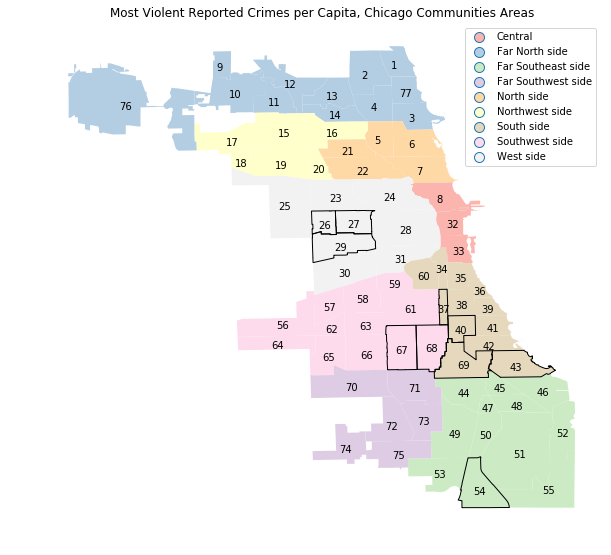

In [27]:
#A list of the 10 most violent community areas (per capita) in Chicago
worst = communities[['Name','Violent_Crimes_per']].sort_values(by='Violent_Crimes_per',ascending=False).head(10)
worst = list(worst.index)

#Plot setup
fig, ax = plt.subplots(figsize = (10,15))

#Showing geographically where the worst communities (for violent crime per capita) are located
communities.plot(ax=ax,column='Side',cmap='Pastel1',legend=True,alpha=1)
communities[communities.index.isin(worst)].plot(ax=ax,edgecolor='black',color='none',legend=False,alpha=1)

#Labeling the communities by number to help see the different communities without having borders
for x,y, label in zip(communities.centroid.x,communities.centroid.y,communities.index.astype(int)):
    ax.text(x-.005,y-.005,label)
    

#Formatting
ax.set_title('Most Violent Reported Crimes per Capita, Chicago Communities Areas')
ax.axis('off')
plt.show()


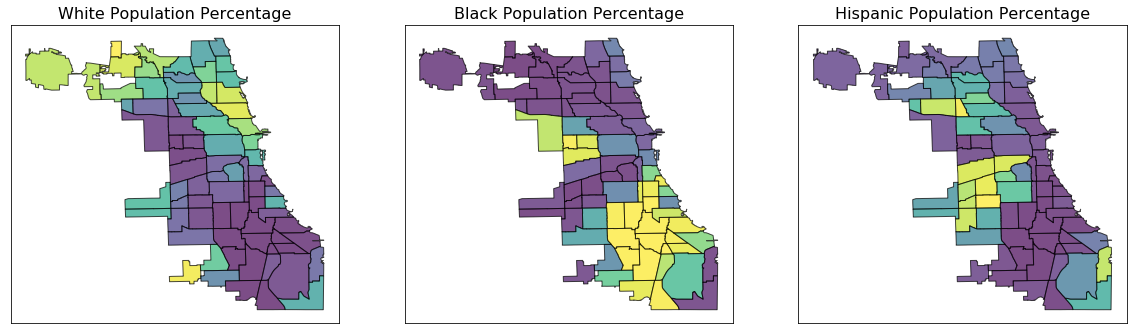

In [28]:
#Showing chicago Demographic data


fig, ax = plt.subplots(1,3,figsize = (20,30))

#white %
communities.plot(ax=ax[0],edgecolor='black',column="White_Percent",cmap='viridis',legend = False,alpha=.7)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("White Population Percentage", size  = 16)

#black %
communities.plot(ax=ax[1],edgecolor='black',column="Black_Percent",cmap='viridis',legend = False,alpha=.7)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title("Black Population Percentage", size  = 16)

#hispanic %
communities.plot(ax=ax[2],edgecolor='black',column="His_Percent",cmap='viridis',legend = False,alpha=.7)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title("Hispanic Population Percentage", size  = 16)

plt.show()

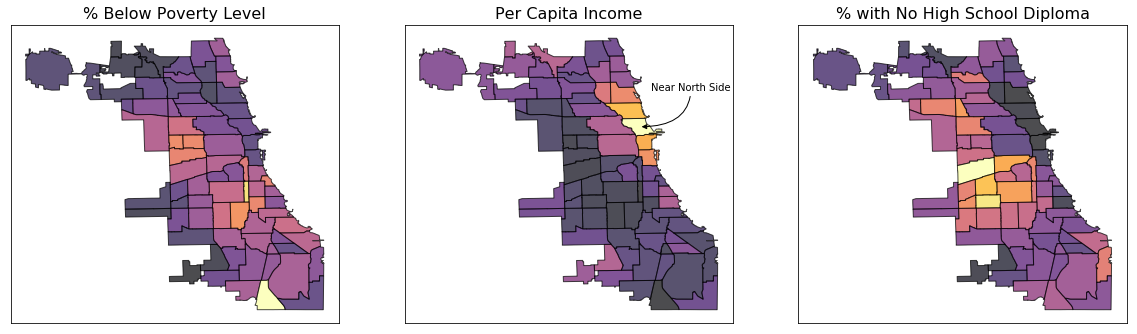

In [31]:
#Socio-Economic Data of Chicago


fig, ax = plt.subplots(1,3,figsize = (20,30))
Lawndale_loc = communities.loc[29]['Center']
Austin_loc = communities.loc[25]['Center']

#Poverty
communities.plot(ax=ax[0],edgecolor='black',column="Below Poverty Level",cmap='inferno',legend = False,alpha=.7)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("% Below Poverty Level", size  = 16)

#Income
communities.plot(ax=ax[1],edgecolor='black',column="Per Capita Income",cmap='inferno',legend = False,alpha=.7)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title("Per Capita Income", size  = 16)

#Education
communities.plot(ax=ax[2],edgecolor='black',column="No High School Diploma",cmap='inferno',legend = False,alpha=.7)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title("% with No High School Diploma", size  = 16)

#Pointing out richest community area in chicago
Near_North_loc = communities.loc[8]['Center']
my_props = {'facecolor':'black',  'arrowstyle':'-|>','connectionstyle':'angle3'}
ax[1].annotate('Near North Side', xytext=(Lawndale_loc.x+.10,Lawndale_loc.y+.09),
               xy=(Near_North_loc.x,Near_North_loc.y),arrowprops = my_props)


plt.show()

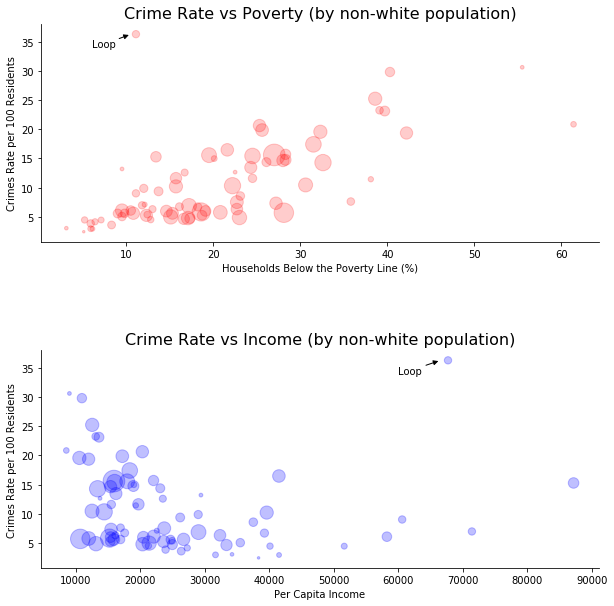

In [32]:
#Crime Rate and Socio-Economic Status

fig, ax = plt.subplots(2,1,figsize=(10,10)) 

#First plot: Crime rate vs poverty, with minority population the bubble size
sns.regplot(x='Below Poverty Level', y='Crimes_per_100', data=communities,    
            ax = ax[0], color = 'red',ci=False,fit_reg=False,scatter_kws={'s':communities['non_white_count']/200,'alpha':0.2})

ax[0].set_xlabel('Households Below the Poverty Line (%)')
ax[0].set_ylabel('Crimes Rate per 100 Residents')
ax[0].set_title('Crime Rate vs Poverty (by non-white population)',fontsize = 16)


#Second plot: Crime rate vs Income
sns.regplot(x='Per Capita Income', y='Crimes_per_100', data=communities,    
            ax = ax[1], color = 'blue',ci=False,fit_reg=False,scatter_kws={'s':communities['non_white_count']/200,'alpha':0.25})   

ax[1].set_ylabel('Crimes Rate per 100 Residents')
ax[1].set_xlabel('Per Capita Income')
ax[1].set_title('Crime Rate vs Income (by non-white population)',fontsize = 16)

#Showing downtown chicago, an outlier in both blots
my_props = {'facecolor':'black',  'arrowstyle':'-|>','connectionstyle':'arc3'}
ax[0].annotate('Loop', xytext=(6,34), xy=(10.5,36.25),arrowprops = my_props)
ax[1].annotate('Loop', xytext=(60000,34), xy=(66500,36.25),arrowprops = my_props)

#Formatting
fig.subplots_adjust(hspace=.5)
sns.despine(ax=ax[0])
sns.despine(ax=ax[1])
plt.show()

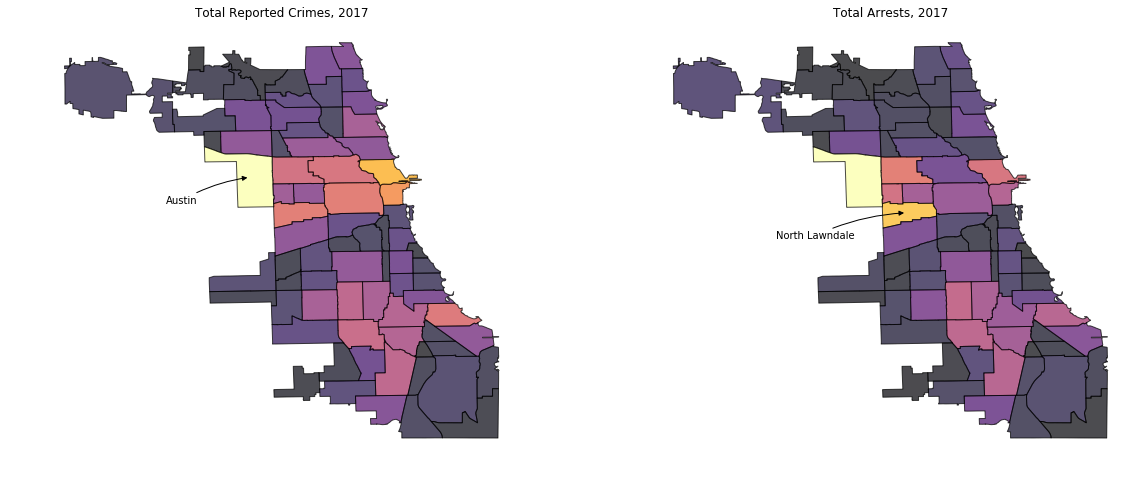

In [33]:
#Total Crimes and arrests per community

fig, ax = plt.subplots(1,2,figsize = (20,8))

communities.plot(ax=ax[0],edgecolor='black',column="2017_Crimes",cmap='inferno',legend = False,alpha=.7)
communities.plot(ax=ax[1],edgecolor='black',column="2017_Arrests",cmap='inferno',legend = False,alpha=.7)


#More looping arrow
my_props = {'facecolor':'black',  'arrowstyle':'-|>','connectionstyle':'arc3,rad=-.1'}

#Location for communities of note
Lawndale_loc = communities.loc[29]['Center']
Austin_loc = communities.loc[25]['Center']

#Annotations
ax[1].annotate('North Lawndale', xytext=(Lawndale_loc.x-.125,Lawndale_loc.y-.025),
               xy=(Lawndale_loc.x,Lawndale_loc.y),arrowprops = my_props)
ax[0].annotate('Austin', xytext=(Austin_loc.x-.08,Austin_loc.y-.025),
               xy=(Austin_loc.x,Austin_loc.y),arrowprops = my_props)


#Formatting
ax[0].axis('off')
ax[1].axis('off')
ax[0].set_title('Total Reported Crimes, 2017')
ax[1].set_title('Total Arrests, 2017')
plt.show()

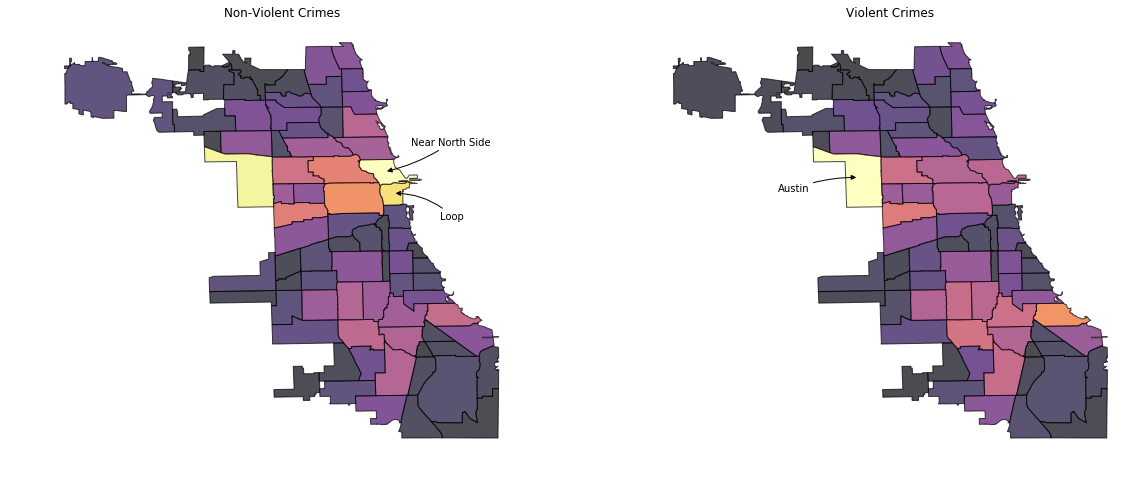

In [34]:
#Violent vs Nonviolent Crimes, by community


fig, ax = plt.subplots(1,2,figsize = (20,8))

communities.plot(ax=ax[0],edgecolor='black',column="non_violent_crimes",cmap='inferno',legend = False,alpha=.7)
communities.plot(ax=ax[1],edgecolor='black',column="Violent_Crimes",cmap='inferno',legend = False,alpha=.7)


#More looping arrow
my_props = {'facecolor':'black',  'arrowstyle':'-|>','connectionstyle':'arc3,rad=-.1'}

#Locations of the notable communities
Near_North_loc = communities.loc[8]['Center']
Loop_loc = communities.loc[32]['Center']

ax[0].annotate('Near North Side', xytext=(Near_North_loc.x+.025,Near_North_loc.y+.025),
               xy=(Near_North_loc.x,Near_North_loc.y),arrowprops = my_props)

#This arrow needed to be convex instead of concave
ax[0].annotate('Loop', xytext=(Loop_loc.x+.045,Loop_loc.y-.025),
               xy=(Loop_loc.x,Loop_loc.y),
               arrowprops = {'facecolor':'black',  'arrowstyle':'-|>','connectionstyle':'arc3,rad=.2'})

ax[1].annotate('Austin', xytext=(-87.84,41.88), xy=(-87.763,41.894),arrowprops = my_props)


#Formatting
ax[0].axis('off')
ax[0].set_title('Non-Violent Crimes')
ax[1].axis('off')
ax[1].set_title('Violent Crimes')
plt.show()

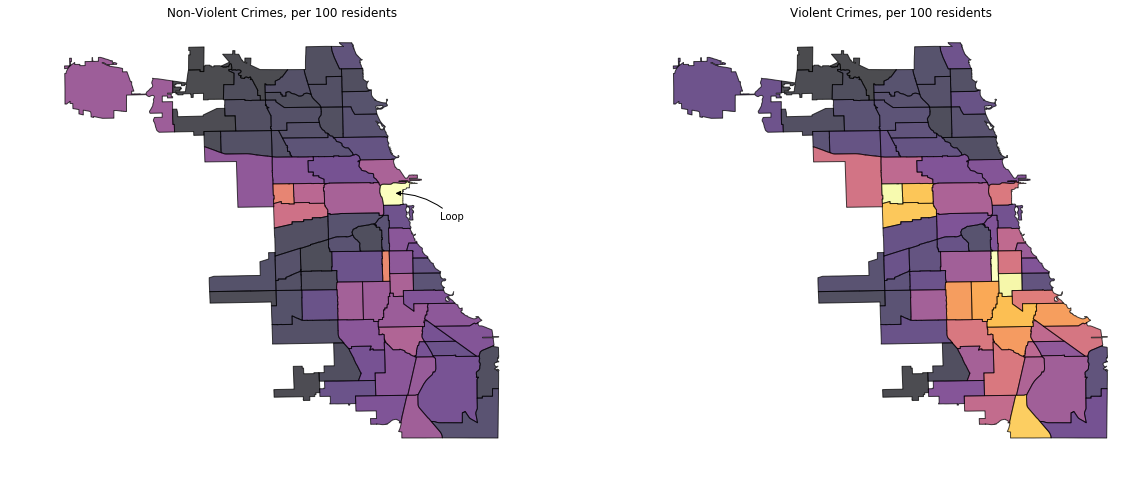

In [35]:
#Same plot as above except per capita.

fig, ax = plt.subplots(1,2,figsize = (20,8))

#Using per-capita column this time
communities.plot(ax=ax[0],edgecolor='black',column="non_violent_crimes_per",cmap='inferno',legend = False,alpha=.7)
communities.plot(ax=ax[1],edgecolor='black',column="Violent_Crimes_per",cmap='inferno',legend = False,alpha=.7)


#The loop is certainly an intersting result. Let's label it
my_props = {'facecolor':'black',  'arrowstyle':'->'}
ax[0].annotate('Loop', xytext=(Loop_loc.x+.045,Loop_loc.y-.025),
               xy=(Loop_loc.x,Loop_loc.y),
               arrowprops = {'facecolor':'black',  'arrowstyle':'-|>','connectionstyle':'arc3,rad=.2'})

#Formatting
ax[0].axis('off')
ax[0].set_title('Non-Violent Crimes, per 100 residents')

ax[1].axis('off')
ax[1].set_title('Violent Crimes, per 100 residents')
plt.show()

In [36]:
#An analysis of violent and non-violent reported crimes by 'Side' of Chicago. Sorted by total reported crimes

side = communities.groupby('Side').sum()
side = side.sort_values(by=['2017_Crimes'],ascending=False)
side['sum'] = side['Violent_Crimes']+side['non_violent_crimes']
side[['Violent_Crimes','non_violent_crimes','sum']].rename(columns={'Violent_Crimes':'Violent Crimes',
                                                                    'non_violent_crimes':'Non-Violent Crimes',
                                                                    'sum':'Total'}).astype(int)

,Violent Crimes,Non-Violent Crimes,Total
Side,,,
West side,24597,42501,67098
Southwest side,14323,21074,35397
South side,15144,19959,35103
Far Southeast side,12586,18422,31008
Central,5093,19756,24849
Far North side,7533,16505,24038
North side,5195,13855,19050
Far Southwest side,6445,10255,16700
Northwest side,5200,9401,14601


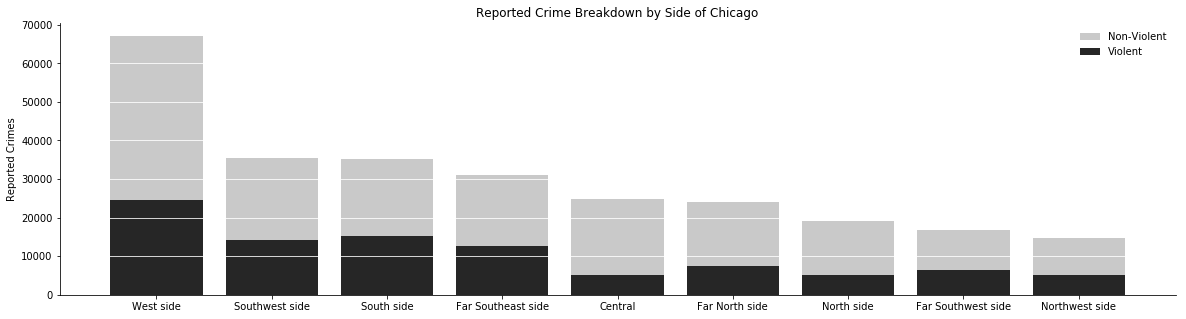

In [37]:
#Stacked bar chart to visualize the data above
fig,ax = plt.subplots(figsize=(20,5))


plt.bar(side.index,side['non_violent_crimes'],label='Non-Violent',color='Silver',alpha=.85,bottom=side['Violent_Crimes'])
plt.bar(side.index,side['Violent_Crimes'],label='Violent',color='Black',alpha=.85,)


#Formatting
sns.despine(ax=ax)
ax.legend(frameon=False)
ax.grid(axis='y', color='white')
ax.set_ylabel('Reported Crimes')
ax.set_title('Reported Crime Breakdown by Side of Chicago')
plt.show()


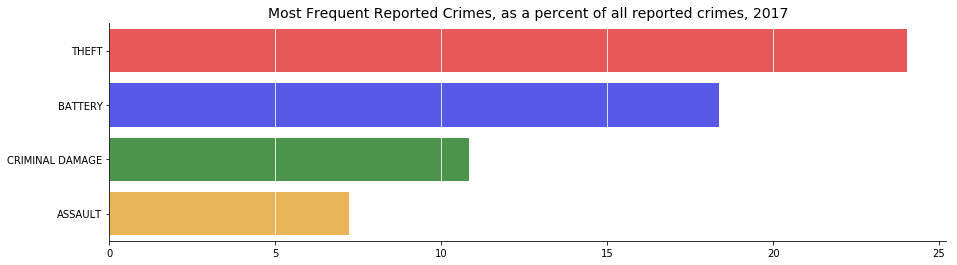

In [38]:
#A reminder of the plot shown earlier: most common reported crimes, 2017

fig, ax = plt.subplots(figsize = (15,4))

#Only showing the top 4 crime types
c2 = crime_type17[:4]

sns.barplot(ax=ax,y=c2.index,x=c2['Percent'],palette=['Red','Blue','Green','Orange'],alpha=.75)


#Formatting
ax.grid(axis='x', color='white')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Most Frequent Reported Crimes, as a percent of all reported crimes, 2017',fontsize=14)
sns.despine(ax=ax)

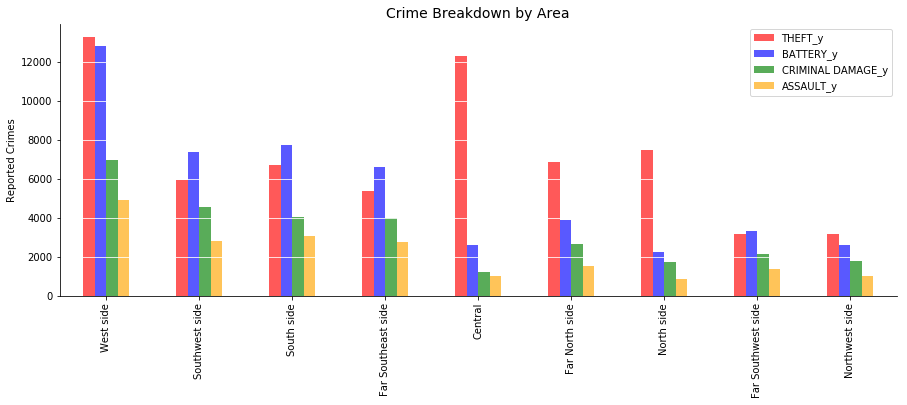

In [39]:
#Which sides of Chicago these crimes are coming from

#Re-establishing side dataframe
side = communities.groupby('Side').sum()
side.sort_values('2017_Crimes',inplace=True,ascending=False)


fig,ax = plt.subplots(figsize=(15,5))

#Plotting each of the most common crime types by Side of Chicago. The _y is used for Reported Crime totals, as opposed to arrest totals
side[['THEFT_y','BATTERY_y','CRIMINAL DAMAGE_y','ASSAULT_y']].plot.bar(ax=ax,color=['red','blue','green','orange'],alpha=.65)


sns.despine(ax=ax)
ax.set_xlabel('')
ax.set_ylabel('Reported Crimes')
ax.set_title('Crime Breakdown by Area',fontsize=14)
ax.grid(axis='y', color='white')

plt.show()


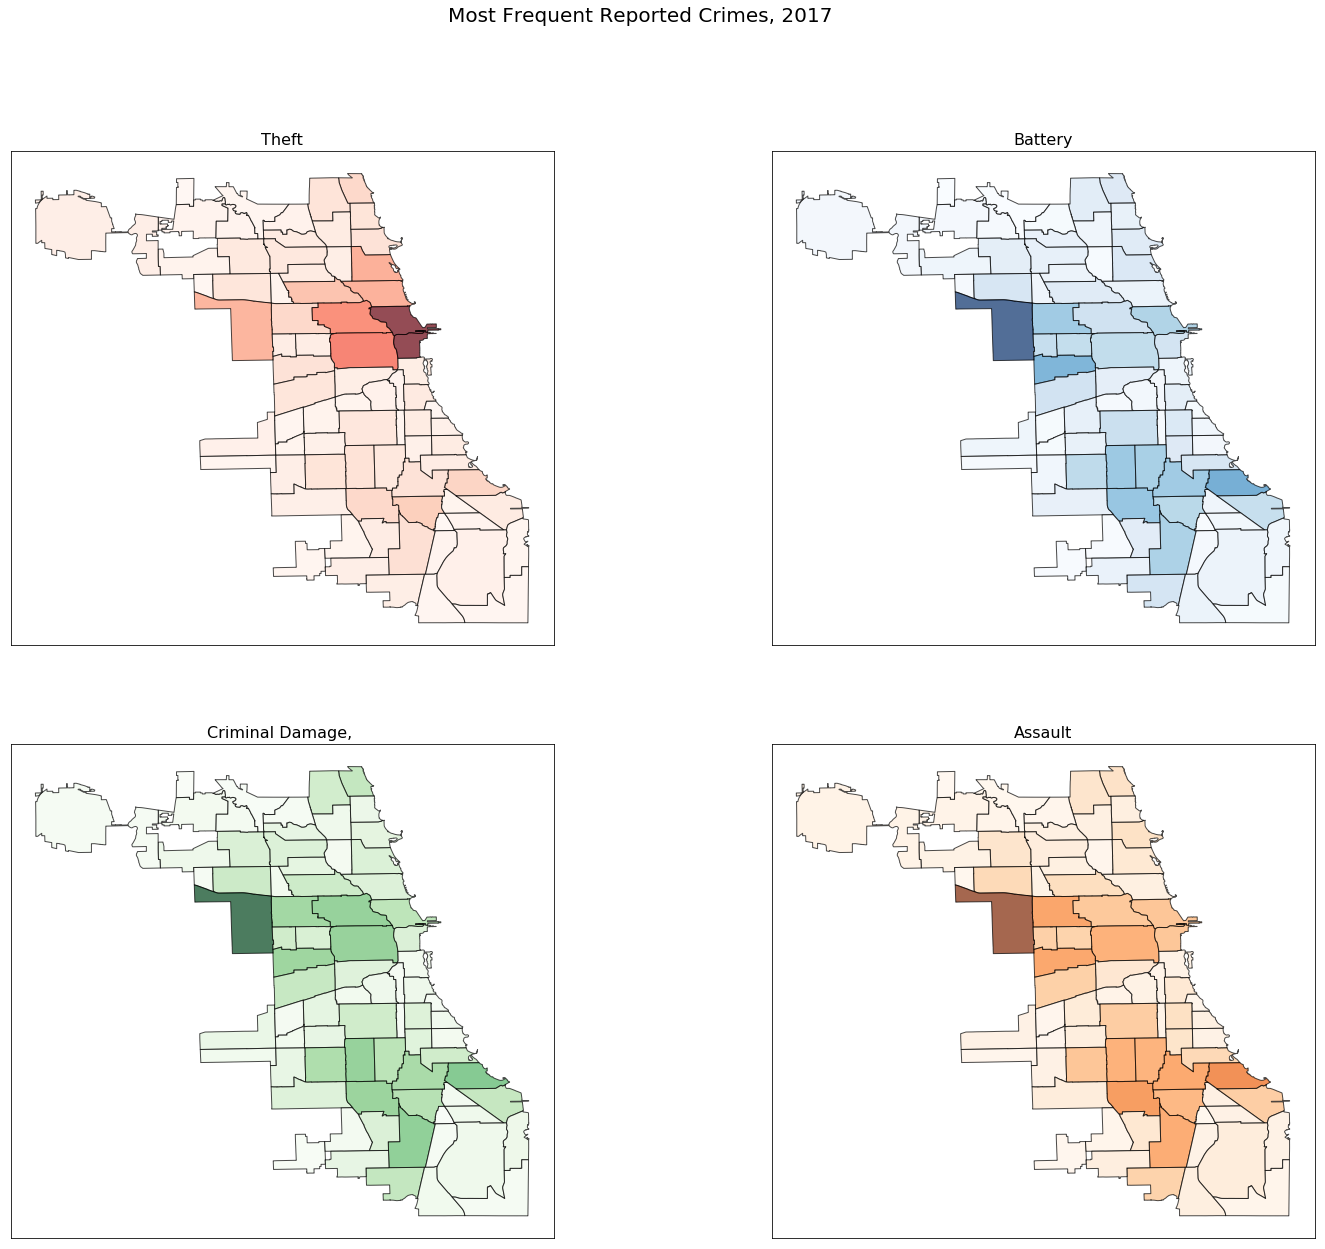

In [41]:
#Geographic dispay of the above

fig, ax = plt.subplots(2,2,figsize=(25,20))

#Theft
communities.plot(ax=ax[0,0],edgecolor='black',column="THEFT_y",cmap="Reds",legend = False,alpha=.7)
ax[0,0].set_title('Theft',fontsize=16)
ax[0,0].get_xaxis().set_visible(False)
ax[0,0].get_yaxis().set_visible(False)

#Battery
communities.plot(ax=ax[0,1],edgecolor='black',column="BATTERY_y",cmap="Blues",legend = False,alpha=.7)
ax[0,1].set_title('Battery',fontsize=16)
ax[0,1].get_xaxis().set_visible(False)
ax[0,1].get_yaxis().set_visible(False)

#Criminal Damage
communities.plot(ax=ax[1,0],edgecolor='black',column="CRIMINAL DAMAGE_y",cmap="Greens",legend = False,alpha=.7)
ax[1,0].set_title('Criminal Damage, ',fontsize=16)
ax[1,0].get_xaxis().set_visible(False)
ax[1,0].get_yaxis().set_visible(False)


#Assault
communities.plot(ax=ax[1,1],edgecolor='black',column="ASSAULT_y",cmap="Oranges",legend = False,alpha=.7)
ax[1,1].set_title('Assault',fontsize=16)
ax[1,1].get_xaxis().set_visible(False)
ax[1,1].get_yaxis().set_visible(False)

#Formatting
fig.suptitle("Most Frequent Reported Crimes, 2017", fontsize=20)
plt.show()

In [42]:
#Theft Types. Note no need for _y, as this data is coming from crimes_2017 dataset.
theft_type = crimes_2017[crimes_2017['Crime']=='THEFT'].groupby('Description').count()['Crime'].sort_values(ascending=False)
pd.DataFrame(theft_type).rename(columns={'Crime':'Theft Count'}).head()

,Theft Count
Description,
$500 AND UNDER,24510
OVER $500,15346
FROM BUILDING,10657
RETAIL THEFT,10459
POCKET-PICKING,2261


In [43]:
#Battery Types
bat_type = crimes_2017[crimes_2017['Crime']=='BATTERY'].groupby('Description').count()['Crime'].sort_values(ascending=False)
pd.DataFrame(bat_type).rename(columns={'Crime':'Battery Count'}).head()

,Battery Count
Description,
DOMESTIC BATTERY SIMPLE,23819
SIMPLE,16181
AGGRAVATED: HANDGUN,2038
AGGRAVATED: OTHER DANG WEAPON,1871
AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,1130


In [44]:
#Criminal Damage Types
cd_type = crimes_2017[crimes_2017['Crime']=='CRIMINAL DAMAGE'].groupby('Description').count()['Crime'].sort_values(ascending=False)
pd.DataFrame(cd_type).rename(columns={'Crime':'Criminal Damage Count'}).head()

,Criminal Damage Count
Description,
TO PROPERTY,13840
TO VEHICLE,13555
CRIMINAL DEFACEMENT,914
TO CITY OF CHICAGO PROPERTY,562
TO STATE SUP PROP,139


In [45]:
#Assault Types
ass_type = crimes_2017[crimes_2017['Crime']=='ASSAULT'].groupby('Description').count()['Crime'].sort_values(ascending=False)
pd.DataFrame(ass_type).rename(columns={'Crime':'Assault Count'}).head()

,Assault Count
Description,
SIMPLE,12738
AGGRAVATED: HANDGUN,2891
AGGRAVATED:KNIFE/CUTTING INSTR,1464
AGGRAVATED: OTHER DANG WEAPON,1091
PRO EMP HANDS NO/MIN INJURY,523


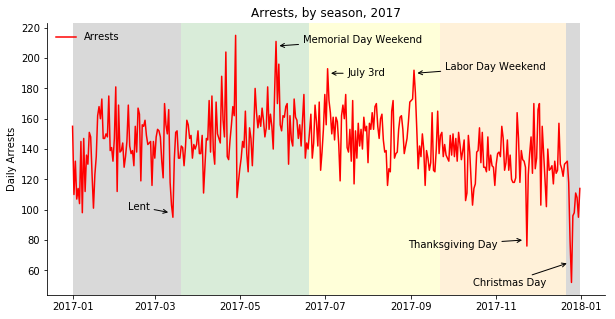

In [46]:
#Creating a dataframe for arrest by date
d2 = crimes_2017[crimes_2017['Arrest']].groupby(by=crimes_2017['Date'].dt.date).count()
d2.index = pd.to_datetime(d2.index)

#Monthly average arrests, decided not to plot
monthly = d2.resample('m',label='left').mean()


fig, ax = plt.subplots(figsize=(10,5))

ax.plot(d2.index, d2['Date'], color = 'red', label = 'Arrests')
#ax.plot(monthly.index, monthly['Date'],color = 'blue', marker='o',label='Monthly Avg')


#Annotating holidays that caused spikes and dips in number of arrests
my_props = {'facecolor':'black',  'arrowstyle':'->'}
ax.annotate('Lent', xy=(dt.datetime(2017,3,12), 98), xytext=(dt.datetime(2017,2,10), 100), 
            arrowprops={'facecolor':'black',  'arrowstyle':'->'})
ax.annotate('Christmas Day', xy=(dt.datetime(2017,12,23), 65), xytext=(dt.datetime(2017,10,15), 50), 
            arrowprops={'facecolor':'black',  'arrowstyle':'->'})
ax.annotate('Thanksgiving Day', xy=(dt.datetime(2017,11,21), 80), xytext=(dt.datetime(2017,8,30), 75), 
            arrowprops={'facecolor':'black',  'arrowstyle':'->'})
ax.annotate('Memorial Day Weekend', xy=(dt.datetime(2017,5,28), 208), xytext=(dt.datetime(2017,6,15), 210), 
            arrowprops={'facecolor':'black',  'arrowstyle':'->'})
ax.annotate('July 3rd', xy=(dt.datetime(2017,7,4), 190), xytext=(dt.datetime(2017,7,17), 188), 
            arrowprops={'facecolor':'black',  'arrowstyle':'->'})
ax.annotate('Labor Day Weekend', xy=(dt.datetime(2017,9,4), 190), xytext=(dt.datetime(2017,9,25), 192), 
            arrowprops={'facecolor':'black',  'arrowstyle':'->'})


#Background for season to see if any seasonal patterns to crime
plt.axvspan(dt.datetime(2017,1,1), dt.datetime(2017,3,20), facecolor='black', alpha=0.15)
plt.axvspan(dt.datetime(2017,3,20), dt.datetime(2017,6,20), facecolor='green', alpha=0.15)
plt.axvspan(dt.datetime(2017,6,20), dt.datetime(2017,9,22), facecolor='yellow', alpha=0.15)
plt.axvspan(dt.datetime(2017,9,22), dt.datetime(2017,12,21), facecolor='orange', alpha=0.15)
plt.axvspan(dt.datetime(2017,12,21), dt.datetime(2017,12,31), facecolor='black', alpha=0.15)

#Formatting
ax.set_title('Arrests, by season, 2017')
ax.set_ylabel('Daily Arrests')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(frameon=False,loc=2)

plt.show()

# A Look into Drugs Arrests

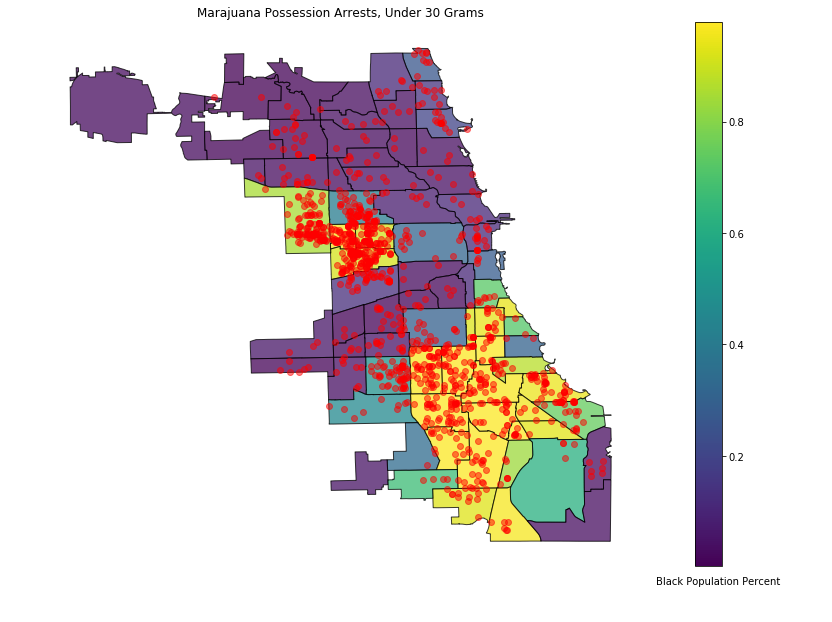

In [47]:
#Small amount marajuana possession arrests by location

fig, ax = plt.subplots(figsize=(20,10))

#Each community colored by the percent of citizens that are black
communities.plot(ax=ax,edgecolor='black',column='Black_Percent',cmap='viridis',legend=True,alpha=.75)

#Dot for each small amount Marajuana arrest
crimes_2017[crimes_2017['Description']=='POSS: CANNABIS 30GMS OR LESS'].plot(ax=ax,color='red',alpha=.5)

#Labeling the legend
ax.annotate('Black Population Percent',xy=(.788,.06),xycoords='figure fraction')


#Formatting
ax.axis('off')
ax.set_title('Marajuana Possession Arrests, Under 30 Grams')
plt.show()

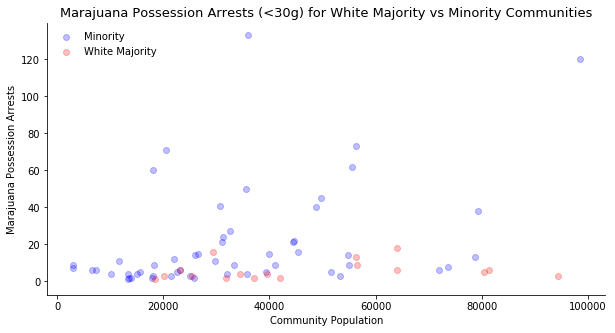

In [48]:
#Showing minority communities have far more marajuana arrests than white-majority communities


#Create a new column with a dummy to tell if it's white-majority or not. Unnecessary to create new dataframe
x = communities
x['minority'] = x['non_white']>.5

fig, ax = plt.subplots(figsize=(10,5)) 

#Dots are blue for minority communities; red for white-majority communities
sns.regplot(x='TOTAL', y='Weed_Arrests', data=x[x['minority']],    
            ax = ax, color = 'blue',ci=False,fit_reg=False,scatter_kws={'alpha':0.25},label='Minority')   
sns.regplot(x='TOTAL', y='Weed_Arrests', data=x[~x['minority']],    
            ax = ax, color = 'red',ci=False,fit_reg=False,scatter_kws={'alpha':0.25},label='White Majority') 


#Formatting
ax.legend(frameon=False)
ax.set_ylabel('Marajuana Possession Arrests')
ax.set_xlabel('Community Population')
ax.set_title('Marajuana Possession Arrests (<30g) for White Majority vs Minority Communities',fontsize=13)

sns.despine(ax = ax)
                                   


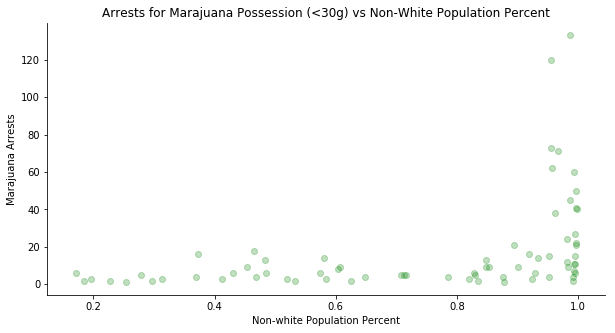

In [49]:
#Another plot showing similar information. Only communities that are primarily non-white have large amounts of marajuana possession arrest

fig, ax = plt.subplots(figsize=(10,5)) 

sns.regplot(x='non_white',marker='o', y='Weed_Arrests', data=communities,    
            ax = ax, color = 'green',ci=False,fit_reg=False,scatter_kws={'alpha':0.25})   

ax.set_ylabel('Marajuana Arrests')  
ax.set_xlabel('Non-white Population Percent')

ax.set_title('Arrests for Marajuana Possession (<30g) vs Non-White Population Percent')
sns.despine(ax = ax)
                                   

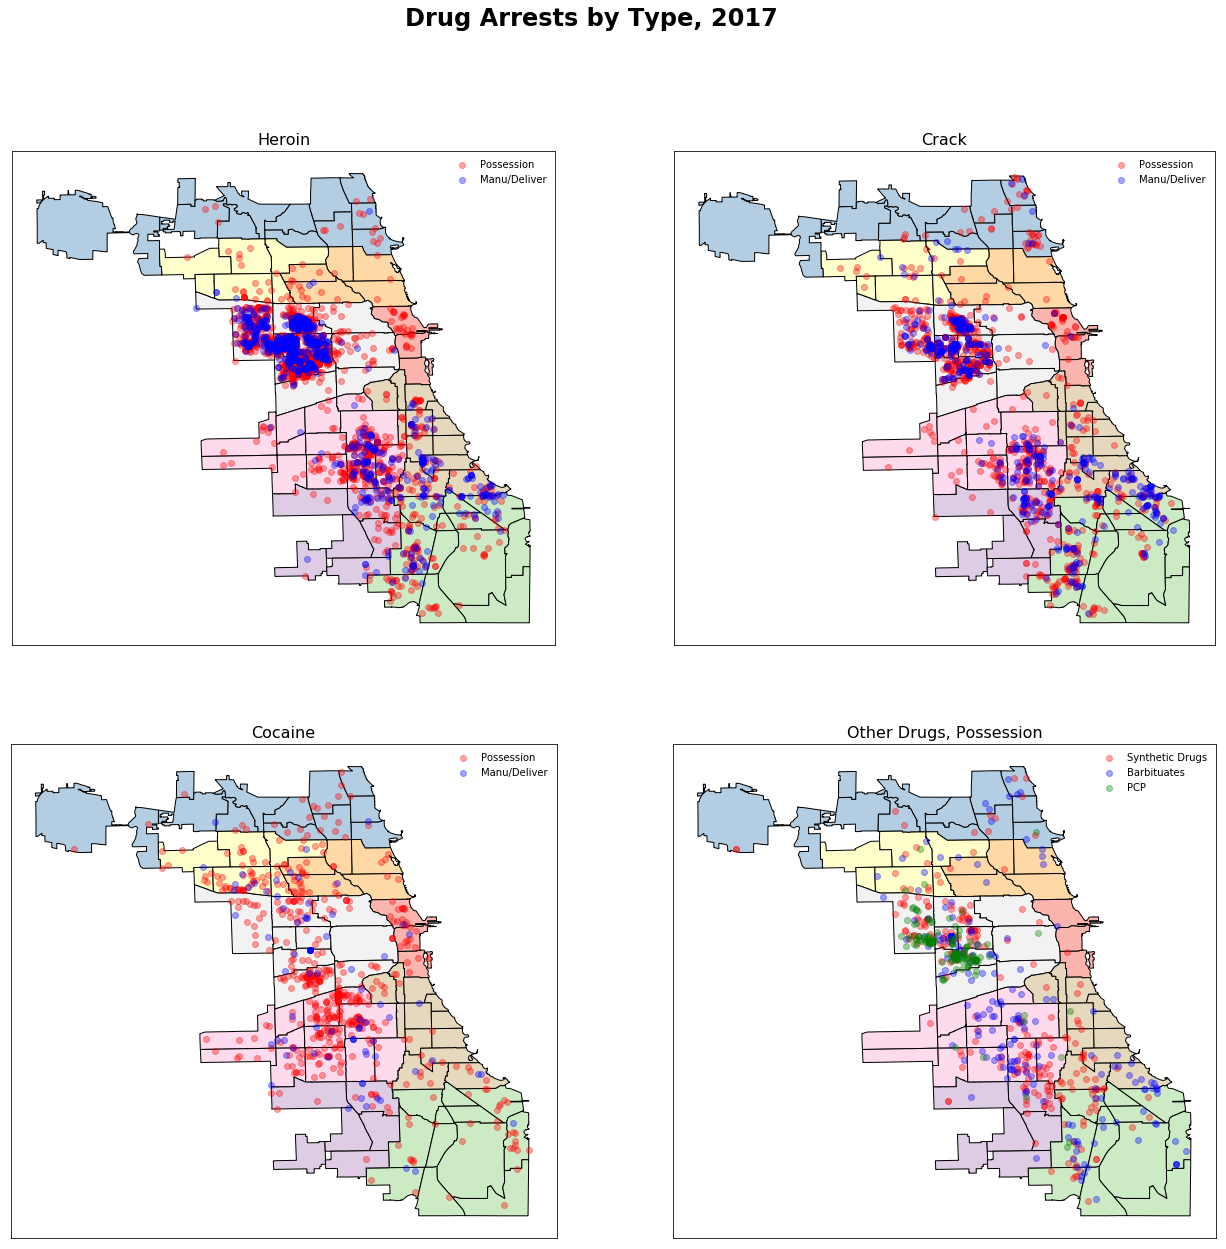

In [50]:
#A look at the other most common drug offenses and their geographic distribution

fig, ax = plt.subplots(2,2,figsize=(25,20))

#Heroin
communities.plot(ax=ax[0,0],edgecolor='black',column='Side',cmap='Pastel1',legend = False)
crimes_2017[crimes_2017['Description']=='POSS: HEROIN(WHITE)'].plot(ax=ax[0,0],color='red',alpha=.35,label='Possession')
crimes_2017[crimes_2017['Description']=='MANU/DELIVER: HEROIN (WHITE)'].plot(ax=ax[0,0],color='blue',alpha=.35,label = 'Manu/Deliver')
ax[0,0].set_title('Heroin',fontsize=16)
ax[0,0].get_xaxis().set_visible(False)
ax[0,0].get_yaxis().set_visible(False)
ax[0,0].legend(frameon=False)

#Crack
communities.plot(ax=ax[0,1],edgecolor='black',column='Side',cmap='Pastel1',legend = False)
crimes_2017[crimes_2017['Description']=='POSS: CRACK'].plot(ax=ax[0,1],color='red',alpha=.35,label='Possession')
crimes_2017[crimes_2017['Description']=='MANU/DELIVER:CRACK'].plot(ax=ax[0,1],color='blue',alpha=.35,label = 'Manu/Deliver')
ax[0,1].set_title('Crack',fontsize=16)
ax[0,1].get_xaxis().set_visible(False)
ax[0,1].get_yaxis().set_visible(False)
ax[0,1].legend(frameon=False)

#Cocaine
communities.plot(ax=ax[1,0],edgecolor='black',column='Side',cmap='Pastel1',legend = False)
crimes_2017[crimes_2017['Description']=='POSS: COCAINE'].plot(ax=ax[1,0],color='red',alpha=.35,label='Possession')
crimes_2017[crimes_2017['Description']=='MANU/DELIVER:COCAINE'].plot(ax=ax[1,0],color='blue',alpha=.35,label = 'Manu/Deliver')
ax[1,0].set_title('Cocaine',fontsize=16)
ax[1,0].get_xaxis().set_visible(False)
ax[1,0].get_yaxis().set_visible(False)
ax[1,0].legend(frameon=False)

#Other
communities.plot(ax=ax[1,1],edgecolor='black',column='Side',cmap='Pastel1',legend = False)
crimes_2017[crimes_2017['Description']=='POSS: SYNTHETIC DRUGS'].plot(ax=ax[1,1],color='red',alpha=.35,label = 'Synthetic Drugs')
crimes_2017[crimes_2017['Description']=='POSS: BARBITUATES'].plot(ax=ax[1,1],color='blue',alpha=.35,label='Barbituates')
crimes_2017[crimes_2017['Description']=='POSS: PCP'].plot(ax=ax[1,1],color='green',alpha=.35,label='PCP')
ax[1,1].set_title('Other Drugs, Possession',fontsize=16)
ax[1,1].get_xaxis().set_visible(False)
ax[1,1].get_yaxis().set_visible(False)
ax[1,1].legend(frameon=False)

fig.suptitle('Drug Arrests by Type, 2017',fontsize=24,weight=600)
fig.subplots_adjust(wspace=-.1)

plt.show()

# Austin, November 2018: A Case Study

In [51]:
#Dataset containing just Nov 2018 crime data
dec = pd.read_csv('Crimes Nov 2018.csv')

#Subsetting and formatting data
dec['Date'] = pd.to_datetime(dec['Date'])
austin = dec[(dec['Date'].dt.year==2018) & (dec['Community Area']==25) & (dec['Date'].dt.month==11)]
austin = austin.rename(columns={'Primary Type':'Crime','Community Area':'Community'})
austin = austin.drop(['IUCR','ID','Case Number'],axis = 1)

#Converting to a GeoDataFrame
austin['Location'] = list(zip(austin.Longitude, austin.Latitude))
austin['Location'] = austin['Location'].apply(Point)
austin = gpd.GeoDataFrame(austin, geometry='Location')
austin.sort_values('Date',inplace=True)


### Who

In [52]:
#Some summary statistics of Austin
a = communities.loc[25]
who = a[:14].append(a[16:17])
who = who.append(a[51:58])
who = pd.DataFrame(who)
who = who.rename(columns={25.0:'Value'})
who

,Value
Name,Austin
White,4364
Black,83837
American Indian,161
Asian,573
Other,74
Hispanic,8722
Multiple,783
TOTAL,98514
non_white,0.955702


In [53]:
#Communities by population, Austin #1
communities[['Name','TOTAL']].sort_values(by='TOTAL',ascending=False).head()

,Name,TOTAL
25.0,Austin,98514
6.0,Lake View,94368
24.0,West Town,81432
8.0,Near North Side,80484
30.0,South Lawndale,79288


### What

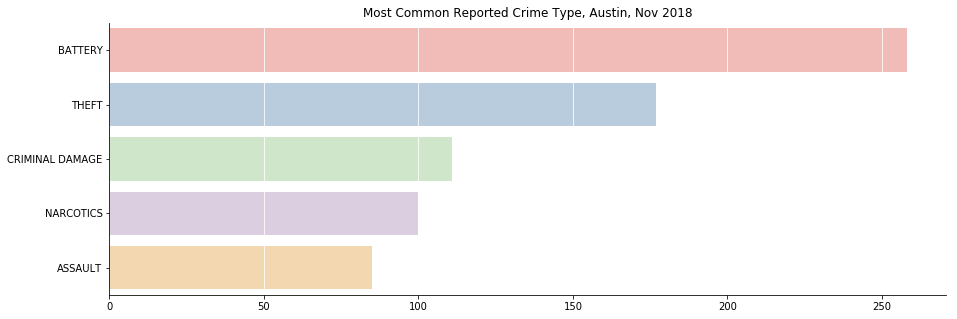

In [54]:
#Crime types in austin
what = austin.groupby('Crime').count().sort_values(by='Date',ascending=False)

fig, ax = plt.subplots(figsize = (15,5))

sns.barplot(ax=ax,y=what.index[:5],x=what['Location'][:5],palette='Pastel1',alpha=1)

#Formatting
ax.grid(axis='x', color='white')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Most Common Reported Crime Type, Austin, Nov 2018')
sns.despine(ax=ax)


In [55]:
#Battery Type
bat = austin[austin['Crime']=='BATTERY'].groupby('Description').count().sort_values(by='Date',ascending=False)
pd.DataFrame(bat['Crime']).head().rename(columns={'Crime':'Battery Type'})

,Battery Type
Description,
DOMESTIC BATTERY SIMPLE,150
SIMPLE,55
AGGRAVATED: OTHER DANG WEAPON,10
AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST,9
AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,8


In [56]:
#Theft Type
theft = austin[austin['Crime']=='THEFT'].groupby('Description').count().sort_values(by='Date',ascending=False)
pd.DataFrame(theft['Crime']).head().rename(columns={'Crime':'Theft Type'})

,Theft Type
Description,
$500 AND UNDER,75
OVER $500,45
RETAIL THEFT,24
FROM BUILDING,20
PURSE-SNATCHING,7


In [57]:
#Criminal Damage Type
cd = austin[austin['Crime']=='CRIMINAL DAMAGE'].groupby('Description').count().sort_values(by='Date',ascending=False)
pd.DataFrame(cd['Crime']).head().rename(columns={'Crime':'Criminal Damage Type'})

,Criminal Damage Type
Description,
TO PROPERTY,63
TO VEHICLE,45
CRIMINAL DEFACEMENT,3


In [58]:
#Narcotics Type
drugs = austin[austin['Crime']=='NARCOTICS'].groupby('Description').count().sort_values(by='Date',ascending=False)
pd.DataFrame(drugs['Crime']).head().rename(columns={'Crime':'Narcotics Type'})

,Narcotics Type
Description,
MANU/DEL:CANNABIS OVER 10 GMS,16
SOLICIT NARCOTICS ON PUBLICWAY,10
POSS: PCP,10
POSS: CANNABIS 30GMS OR LESS,10
POSS: HEROIN(WHITE),9


In [59]:
#Assault Type
ass = austin[austin['Crime']=='ASSAULT'].groupby('Description').count().sort_values(by='Date',ascending=False)
pd.DataFrame(ass['Crime']).head().rename(columns={'Crime':'Assault Type'})

,Assault Type
Description,
SIMPLE,57
AGGRAVATED: HANDGUN,12
AGGRAVATED: OTHER DANG WEAPON,9
AGGRAVATED:KNIFE/CUTTING INSTR,4
PRO EMP HANDS NO/MIN INJURY,2


### Where

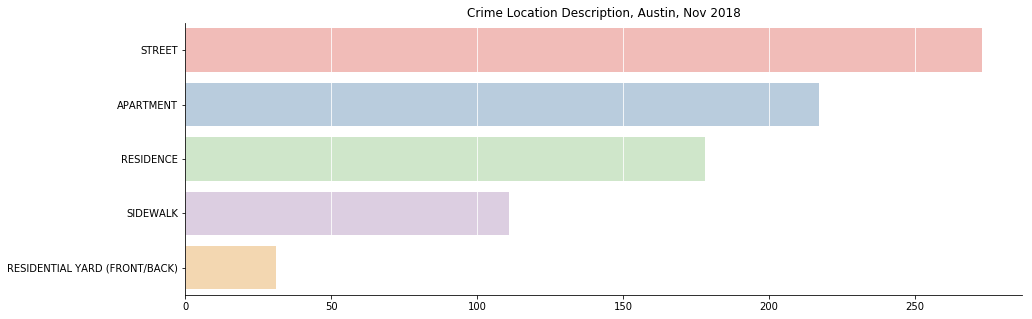

In [60]:
#Crime by location description
where = austin.groupby('Location Description').count().sort_values(by='Date',ascending=False)

fig, ax = plt.subplots(figsize = (15,5))

sns.barplot(ax=ax,y=where.index[:5],x=where['Location'][:5],palette='Pastel1',alpha=1)

#Formatting
ax.grid(axis='x', color='white')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Crime Location Description, Austin, Nov 2018')
sns.despine(ax=ax)


In [61]:
#Police Beats Shapefile, another geographic breakdown of chicago
beats = gpd.read_file('Boundaries - Police Beats (current)/geo_export_1241ea13-8a80-4177-8f2a-e9c3c69332d4.shp')
beats['beat_num'] = pd.to_numeric(beats['beat_num'])

#Finding the police beats of Austin
austin_beat = crimes_2017[crimes_2017['Community']==25]['Beat'].unique()
austin_beat = austin_beat.tolist()

#Susbetting beats data for only Beats in Austin
beats = beats[beats['beat_num'].isin(austin_beat)].sort_values(by=['beat_num'])
beats['Crimes_Count'] = austin.groupby('Beat').count()['Crime'].values

In [62]:
#Datasets containing only data for one crime location description
street = austin[austin['Location Description']=='STREET']
ap = austin[austin['Location Description']=='APARTMENT']
res = austin[austin['Location Description']=='RESIDENCE']
sw = austin[austin['Location Description']=='SIDEWALK']
yard = austin[austin['Location Description']=='RESIDENTIAL YARD (FRONT/BACK)']

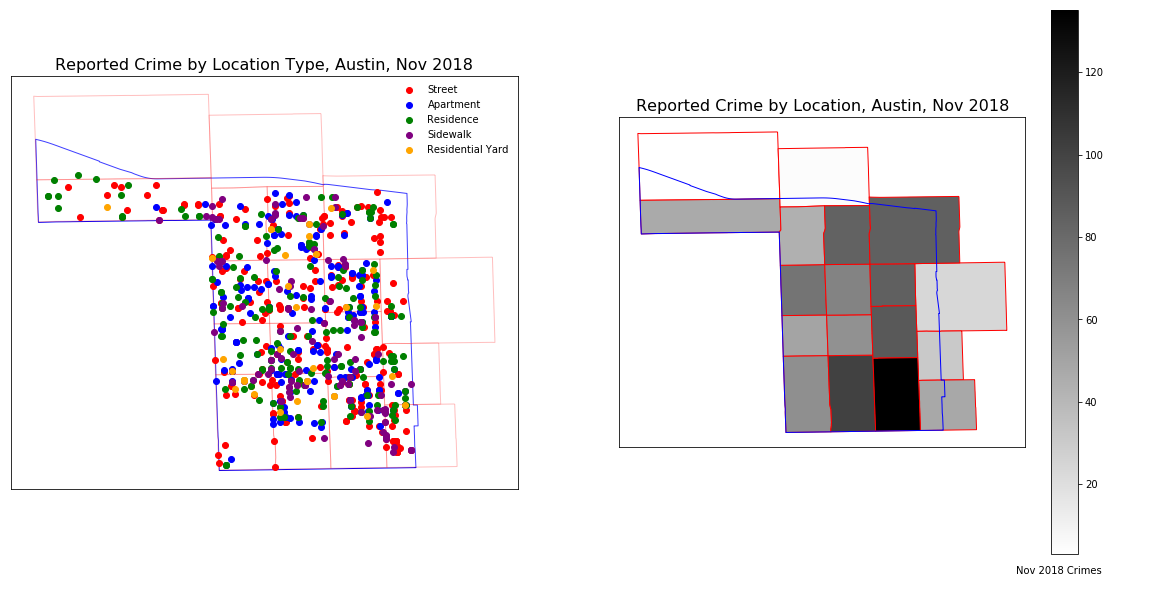

In [63]:
#Another display of where crimes have occured within Austin
fig,ax = plt.subplots(1,2,figsize=(20,10))

#Plotting just the outline of Austin
communities[communities['Name']=='Austin'].plot(ax=ax[0],color='white',edgecolor='blue',alpha=1)

#Plotting the outline of each police beat
beats.plot(ax=ax[0],edgecolor='red',color='white',alpha=.25,legend=True)

#Plotting each crime by location description
street.plot(ax=ax[0],color='red',label='Street')
ap.plot(ax=ax[0],color='blue',label='Apartment')
res.plot(ax=ax[0],color='green',label='Residence')
sw.plot(ax=ax[0],color='purple',label='Sidewalk')
yard.plot(ax=ax[0],color='orange',label='Residential Yard')

#Plotting density of crimes by police beat
beats.plot(ax=ax[1],edgecolor='red',column='Crimes_Count',cmap='binary',alpha=1,legend=True)
communities[communities['Name']=='Austin'].plot(ax=ax[1],facecolor='none',edgecolor='blue',alpha=1)
ax[1].annotate('Nov 2018 Crimes',xy=(.867,.06),xycoords='figure fraction')


#Formatting
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].legend(frameon=False)
ax[0].set_title('Reported Crime by Location Type, Austin, Nov 2018',fontsize=16)

ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title('Reported Crime by Location, Austin, Nov 2018',fontsize=16)

plt.show()

### When

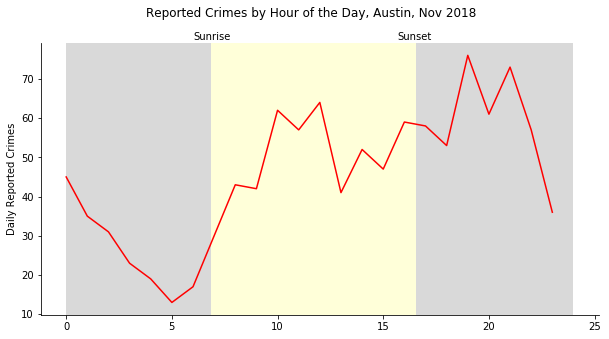

In [64]:
#When are crimes happening?

#Group crimes by hour they occured
when = austin.groupby(austin['Date'].dt.hour).count().sort_index()

fig, ax = plt.subplots(figsize=(10,5))

#plot of crime vs hour
ax.plot(when.index, when['Date'], color = 'red', label = 'Crimes')

#Avg sunrise and sunset in november, to see if any day/night patterns
plt.axvspan(0, 6.83, facecolor='black', alpha=0.15)
plt.axvspan(6.83,16.56, facecolor='yellow', alpha=0.15)
plt.axvspan(16.56,24, facecolor='black', alpha=0.15)

#Annotations for sunrise/sunset
ax.annotate('Sunrise',xy=(6,80), xycoords='data', 
            annotation_clip=False, fontsize=10)
ax.annotate('Sunset',xy=(15.67,80), xycoords='data', 
            annotation_clip=False, fontsize=10)


#Formatting
plt.suptitle('Reported Crimes by Hour of the Day, Austin, Nov 2018')
ax.set_ylabel('Daily Reported Crimes')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

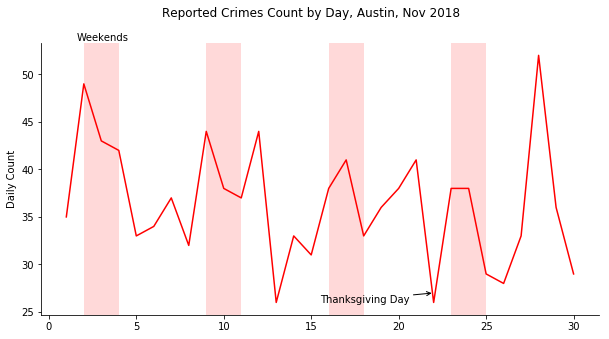

In [65]:
#And now crimes by day for the month

#Group crimes by the date they occured
when = austin.groupby(austin['Date'].dt.day).count().sort_index()

fig, ax = plt.subplots(figsize=(10,5))

#plot of crimes vs day
ax.plot(when.index, when['Date'], color = 'red', label = 'Crimes')

#Shading the weekends to see if there are any day of week patterns
plt.axvspan(2, 4, facecolor='red', alpha=0.15)
plt.axvspan(9,11, facecolor='red', alpha=0.15)
plt.axvspan(16,18, facecolor='red', alpha=0.15)
plt.axvspan(23,25, facecolor='red', alpha=0.15)

ax.annotate("Weekends",(1.6,53.5), xycoords='data', 
            annotation_clip=False, fontsize=10)

ax.annotate('Thanksgiving Day', xy=(22, 27), xytext=(15.5, 26), 
            arrowprops={'facecolor':'black',  'arrowstyle':'->'})

ax.set_ylabel('Daily Count')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.suptitle('Reported Crimes Count by Day, Austin, Nov 2018')



plt.show()